# 第4章 機械学習の体験

## 網掛け部分を体験

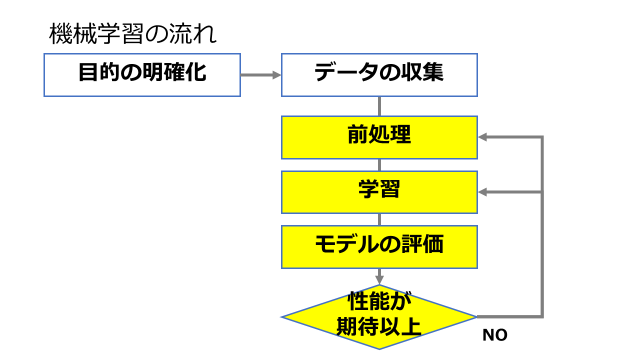

# 4.1 きのこ派とたけのこ派に分類する

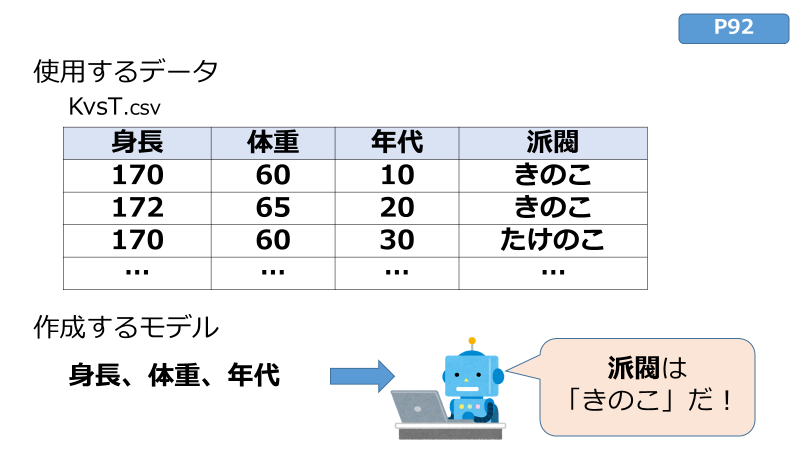

# 4.2 pandas超入門

**問1**  
以下のコメントに沿って実装してください。

(1)pandasライブラリをpdという名前でインポートしてください

In [ ]:
# pandasをpdという名前でインポートする
import pandas as pd

(2)以下の内容のデータフレームを作成してください。  
この時、データフレームのコンストラクタにはディクショナリ型のデータを渡してください。

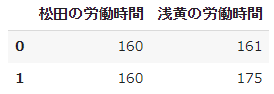

In [ ]:
# DataFrameのコンストラクタにディクショナリ型のデータを渡し、データフレームを作成する
df = {"松田の労働時間":[160, 160], 
      "浅田の労働時間":[161, 175]}
df = pd.DataFrame(df)
# dfの内容を表示する
df

,松田の労働時間,浅田の労働時間
0,160,161
1,160,175


▶実行結果

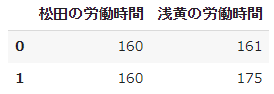

(3) 作成したデータフレームの行数、列数を表示してください

In [ ]:
# dfの行数、列数を表示する
df.shape

(2, 2)

▶実行結果  
(2, 2)

(4) 以下の内容になるよう、データフレームのインデックスを変更してください

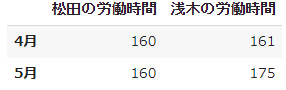

In [ ]:
# dfのインデックスを、実行結果と同じになるように変更する
df.index = ['4月', '5月']
# df.__空欄__

# dfの内容を表示する
df

,松田の労働時間,浅田の労働時間
4月,160,161
5月,160,175


▶実行結果  
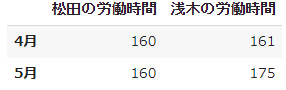

(5) 以下の内容になるよう、データフレームの列名を変更してください

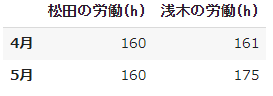

In [ ]:
# dfの列名の変更
df.columns = ["松田の労働(h)", "浅木の労働(h)"]

# dfの内容を表示する
df

,松田の労働(h),浅木の労働(h)
4月,160,161
5月,160,175


▶実行結果  
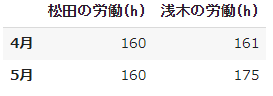

(6) データフレームのインデックス、列名をそれぞれ表示してください

In [ ]:
# インデックスを表示する
print(df.index)

# 列名を表示する
print(df.columns)

Index(['4月', '5月'], dtype='object')
Index(['松田の労働(h)', '浅木の労働(h)'], dtype='object')


▶実行結果  
Index(['4月', '5月'], dtype='object')  
Index(['松田の労働(h)', '浅木の労働(h)'], dtype='object')

(7)以下の内容のデータフレームを作成してください。  
この時、データフレームのコンストラクタにはリスト型のデータを渡してください。

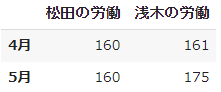

In [ ]:
# DataFrameのコンストラクタに、リスト型のデータを渡し、データフレームを作成する
# また、コンストラクタの引数で、インデックス名、カラム名を指定する。
df2 = pd.DataFrame([[160, 161], [160, 175]], 
                   index = ["4月", "5月"],
                   columns = ["松田の労働", "浅木の労働"])

# df2の内容を表示する
df2

,松田の労働,浅木の労働時間
4月,160,161
5月,160,175


▶実行結果  
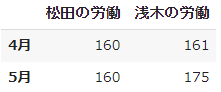

(8) 'KvsT.csv'ファイルを読み込み、データフレームを作成してください

In [ ]:
# 'KvsT.csv'を読み込んで、データフレームに変換する
df = pd.read_csv("KvsT.csv")

# dfの先頭3行を表示する
df.head(3)

,身長,体重,年代,派閥
0,170,60,10,きのこ
1,172,65,20,きのこ
2,170,60,30,たけのこ


▶実行結果  
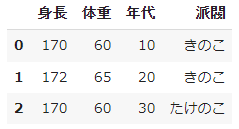

(9) 身長列を取得し、先頭5行を表示してください。  
また、取り出したデータのデータ型を表示してください。

In [ ]:
# dfの身長列のみ取り出す
data = df["身長"]

# 取り出したデータの先頭5行を表示する
print(data.head())

#取り出したデータのデータ型を表示する
print(type(data))

0    170
1    172
2    170
3    170
4    177
Name: 身長, dtype: int64
<class 'pandas.core.series.Series'>


▶実行結果  
0    170  
1    172  
2    170  
3    170  
4    177  
Name: 身長, dtype: int64  
<class 'pandas.core.series.Series'>

(10) 身長列、体重列をまとめて取得し、先頭5行を表示してください。  
また、取り出したデータのデータ型を表示してください。

In [ ]:
# dfから身長列、体重列を取り出す
data = df[["身長", "体重"]]

# 取り出したデータの先頭5行を表示する
print(data.head())

#取り出したデータのデータ型を表示する
print(type(data))

    身長  体重
0  170  60
1  172  65
2  170  60
3  170  65
4  177  65
<class 'pandas.core.frame.DataFrame'>


▶実行結果  

  身長 体重  
0  170  60  
1  172  65  
2  170  60  
3  170  65  
4  177  65  
<class 'pandas.core.frame.DataFrame'>

### 参考
* コード4-1～コード4-12


# 4.3 データの前処理

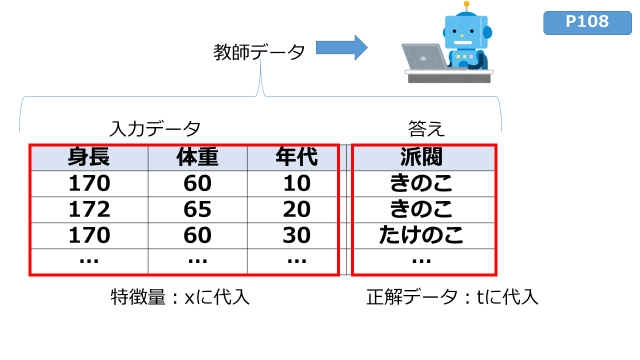

コード4-13 特徴量を変数xに代入(P108)

In [ ]:
# 特徴量（身長列、体重列、年代列）を抜き出して、変数xに代入する
# x = df[['身長', '体重', '年代']]
x = df.iloc[:, 0:3]

# xの先頭5行を表示する
x.head()

,身長,体重,年代
0,170,60,10
1,172,65,20
2,170,60,30
3,170,65,40
4,177,65,10


▶実行結果

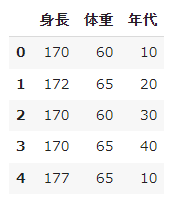

コード4-14 正解データを変数tに代入(P108)

In [ ]:
# 正解データ（派閥列）を抜き出して、変数tに代入する
# t = df['派閥']
t  = df.iloc[:, -1]

# tの先頭5行を表示する
t.head()

0     きのこ
1     きのこ
2    たけのこ
3     きのこ
4    たけのこ
Name: 派閥, dtype: object

▶実行結果

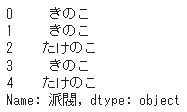

# 4.4 モデルの準備と機械学習の実行

**決定木モデル(分類)を使用する**  
* treeモジュールをインポートする  
 **from sklearn import tree**  


* 決定木モデルのオブジェクトを生成する  
 **tree.DecisionTreeClassifier(random_state = ●)**  
  * **random_state**  
    乱数シード。値を指定し、**同じデータで学習したら同じ学習結果になる**ようにする。


* モデルにデータを学習させる  
 モデルオブジェクト**.fit(特徴量, 正解データ)**


* 学習済みモデルで予測する  
 モデルオブジェクト**.predict(予測データ)**
 * 予測データには二次元リスト、データフレームを渡す

コード4-15 treeモジュールのインポート(P110)

コード4-16 モデルの準備と学習の実行(P111)

In [ ]:
# scikit-learnライブラリのtreeモジュールだけをインポートする
from sklearn import tree

# 決定木のモデル（未学習）のオブジェクトを生成する（乱数シードは0とする）
model = tree.DecisionTreeClassifier(random_state = 0)

# 特徴量x、正解データtを使って、モデルに学習させる
model.fit(x, t)

DecisionTreeClassifier(random_state=0)

コード4-17 きのこかたけのこか予測する(P114)

In [ ]:
# 2次元のリスト型で、身長170cm、体重70kg、年齢20代のデータを作成する
data = [[170,70,20]]

# 作成したデータを用いて予測し、結果を表示する
model.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['きのこ'], dtype=object)

▶実行結果  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"  
array(['きのこ'], dtype=object)

コード4-18 複数の予測を一度に実行(P115)

In [ ]:
# 2次元のリスト型で、以下のデータを作成する
# 身長172cm、体重65kg、年齢20代
# 身長158cm、体重48kg、年齢20代
data = [[172, 65, 20], [158, 48, 20]]
 # 作成したデータを用いて予測し、結果を表示する
model.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['きのこ', 'たけのこ'], dtype=object)

▶実行結果  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"  
array(['きのこ', 'たけのこ'], dtype=object)

**問2**  
「KvsT_predict.csv」をデータフレームに読み込み、そのデータを使って予測してください

In [ ]:
# 'KvsT_predict.csv'をデータフレームに読み込む
df_predict = pd.read_csv("KvsT_predict.csv")

# 読み込んだデータを用いて予測し、結果を表示する
model.predict(df_predict)

array(['たけのこ', 'きのこ', 'きのこ'], dtype=object)

▶実行結果  
array(['たけのこ', 'きのこ', 'きのこ'], dtype=object)

# 4.5 モデルの評価

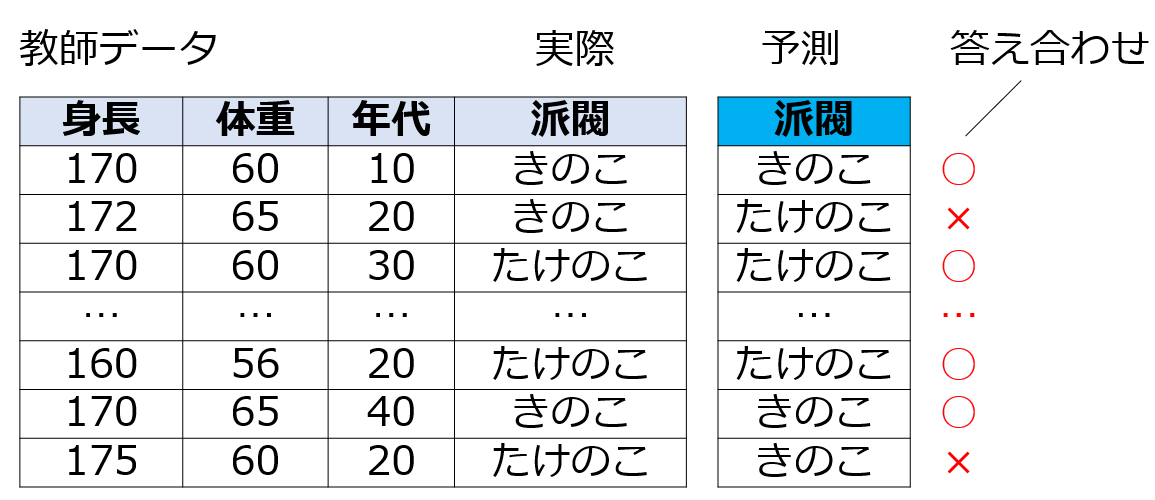

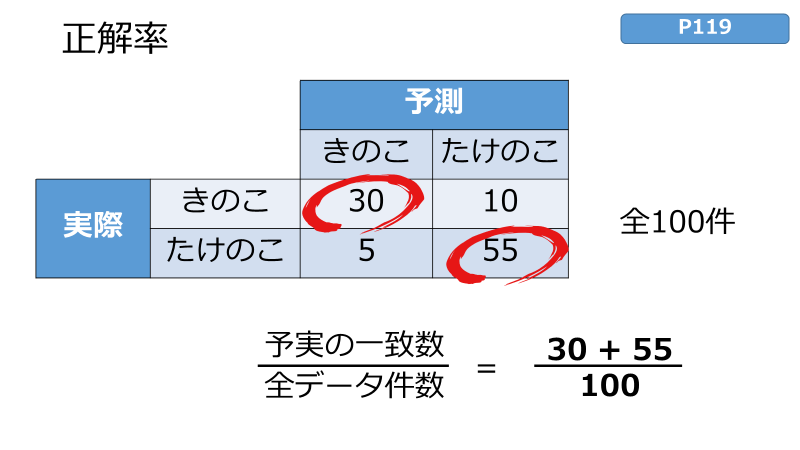

**分類モデルの正解率を表示する**  
model**.score(特徴量, 正解データ)**


コード4-19 正解率の計算(P119)

In [ ]:
#正解率の計算
model.score(x, t)

1.0

▶実行結果  
1.0

# 4.6 モデルの保存

**モデルを再利用する**
* pickleライブラリのインポート  
 **import pickle**

* pickleファイルを保存する  
 pickle**.dump(モデルオブジェクト, ファイルオブジェクト)**

* pickleファイルを読み込む  
 pickle**.load(ファイルオブジェクト)**

* ファイルオブジェクトを作成する  
 **with open('ファイル名', 読み書きのモード)** as 変数名:
  * 読み書きのモード: 'wb'...書き込み。'rb'...読み込み


コード4-20 モデルの保存(P122)

In [ ]:
# pickleライブラリのインポート
import pickle

# 書き込みモードでファイルを開く。ファイル名は'KinokoTakenoko.pkl'とする。
with open("KinokoTakenoko.pkl", "wb") as f:
  pickle.dump(model, f)

コード4-21 KinokoTakenoko.pklからモデルを変数に読み込む(P123)

コード4-22 ファイルから読み込んだ学習済みモデルで予測する(P124)

In [ ]:
# pickleライブラリのインポート
import pickle

# 'KinokoTakenoko.pkl'を読み込みモードでファイルを開く。
with open("KinokoTakenoko.pkl", "rb") as f:
  # pickleファイル(モデル)を読み込み、変数model2に代入する。
  model2 = pickle.load(f)

# pickleから読み込んだモデルを使い、df_predictのデータで予測し、結果を表示する
model2.predict(df_predict)


array(['たけのこ', 'きのこ', 'きのこ'], dtype=object)

▶実行結果

array(['たけのこ', 'きのこ', 'きのこ'], dtype=object)

コード4-23 データの準備・前処理からモデルの評価までの全体像(P125)

In [ ]:
import pandas as pd

# データの読み込み
df = pd.read_csv('KvsT.csv')

# 特徴量と正解データに分割
xcol = ['身長', '体重', '年代']
x = df[xcol]
t = df['派閥']

# モデルの準備と学習
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(x, t)

# 正解率の計算
model.score(x, t)

1.0